# Web Scrapping Project - Retail Store Stock Prices

In [1]:
# Import libraries

from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib


The first thing to do is to establish a connection to the retail store stock page on Yahoo Finance.

In [2]:
# Connect to website for data retrieval

url = 'https://finance.yahoo.com/quote/BBBY?p=BBBY&.tsrc=fin-srch'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"}

page = requests.get(url, headers = headers)

soup1 = BeautifulSoup(page.content, 'html.parser')

soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

title = soup2.find('h1', {'class':"D(ib) Fz(18px)"}).get_text()

at_open = soup2.find('td',{'data-test':"OPEN-value"}).get_text()

at_close = soup2.find('fin-streamer',{'class':"Fw(b) Fz(36px) Mb(-4px) D(ib)"}).get_text()

# Test the data retrieval
print(title)
print(at_open)
print(at_close)



                  Bed Bath & Beyond Inc. (BBBY)
                 

                    0.1085
                   

                  0.1031
                 


Now that the data has been successfully retrieved, it is time to clean the data.

In [3]:
# Seaparting the company name from the ticker symbol
title_strip = title.strip()

title_strip = title_strip.split('.')

# Getting the company name
title = title_strip[0]

# Getting the ticker symbol
ticker = title_strip[1].strip().replace('(', '').replace(')', '')

print(title)
print(ticker)

Bed Bath & Beyond Inc
BBBY


In [4]:
# Getting the at open price
at_open_strip = at_open.strip()

at_open = float(at_open_strip)

print(at_open)

0.1085


In [5]:
# Getting the at close price
at_close_strip = at_close.strip()

at_close = float(at_close_strip)

print(at_close)

0.1031


In [81]:
# Timestamp for data collection through scrapping
import datetime

today = datetime.date.today()

print(today)

2023-02-14


In [87]:
import csv

header = ['Company', 'Ticker', 'Open', 'Close', 'Date Added']
data = [title, ticker, at_open, at_close, today]

# Lets create the first row of the data (ONLY run this once so the initial data is not deleted)

# with open('BedBathBeyondStockWebScrapper.csv', 'w', newline= '', encoding= 'UTF8') as f:
    
#    writer = csv.writer(f)
#    writer.writerow(header)  # intial insertion of data into csv
#    writer.writerow(data)

In [90]:
import pandas as pd

df = pd.read_csv(r'C:\Users\nerol\BedBathBeyondStockWebScrapper.csv')

print(df)

                 Company Ticker   Open  Close  Date Added
0  Bed Bath & Beyond Inc   BBBY  1.895   1.94  2023-02-14
1  Bed Bath & Beyond Inc   BBBY  1.895   1.94  2023-02-14


In [89]:
# Append new data to the dataset

with open('BedBathBeyondStockWebScrapper.csv', 'a+', newline= '', encoding= 'UTF8') as f: # a+ helps append new data
    
    writer = csv.writer(f)
    writer.writerow(data)

It is time to automate our stock price retrieval.

In [2]:
# Automating the process of apending new data to the dataset

def scrape_data():
    url = 'https://finance.yahoo.com/quote/BBBY?p=BBBY&.tsrc=fin-srch'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"}

    page = requests.get(url, headers = headers)

    soup1 = BeautifulSoup(page.content, 'html.parser')

    soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

    title = soup2.find('h1', {'class':"D(ib) Fz(18px)"}).get_text()

    at_open = soup2.find('td',{'data-test':"OPEN-value"}).get_text()

    at_close = soup2.find('fin-streamer',{'class':"Fw(b) Fz(36px) Mb(-4px) D(ib)"}).get_text()
    
    # Format data to look consistent
    title_strip = title.strip()
    title_strip = title_strip.split('.')
    title = title_strip[0]
    ticker = title_strip[1].strip().replace('(', '').replace(')', '')
    
    at_open_strip = at_open.strip()
    at_open = float(at_open_strip)

    at_close_strip = at_close.strip()
    at_close = float(at_close_strip)
    
    # Record the date data is added
    import datetime

    today = datetime.date.today()
    
    # Create the data labels and values
    import csv

    header = ['Company', 'Ticker', 'Open', 'Close', 'Date Added']
    data = [title, ticker, at_open, at_close, today]
    
    # Append the new data
    with open('BedBathBeyondStockWebScrapper.csv', 'a+', newline= '', encoding= 'UTF8') as f: # a+ helps append new data
    
        writer = csv.writer(f)
        writer.writerow(data)


In [ ]:
# Collect BBBY stock data every four hours
while True:
    scrape_data()
    time.sleep(14400)

In [13]:
# Check the .csv file for updates
import pandas as pd

stock_df = pd.read_csv('C:/Users/nerol/Personal Notebooks and notes/BedBathBeyondStockWebScrapper.csv')

stock_df.head()

,Company,Ticker,Open,Close,Date Added
0,Bed Bath & Beyond Inc,BBBY,1.895,1.94,2023-02-14
1,Bed Bath & Beyond Inc,BBBY,1.895,1.94,2023-02-14
2,Bed Bath & Beyond Inc,BBBY,1.895,1.94,2023-02-14
3,Bed Bath & Beyond Inc,BBBY,1.895,1.94,2023-02-14
4,Bed Bath & Beyond Inc,BBBY,1.895,1.94,2023-02-14


In [31]:
stock_df['Date Added'] = pd.to_datetime(stock_df['Date Added'])

In [33]:
stock_df['Date MMDD'] = stock_df['Date Added'].dt.strftime('%m-%d')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

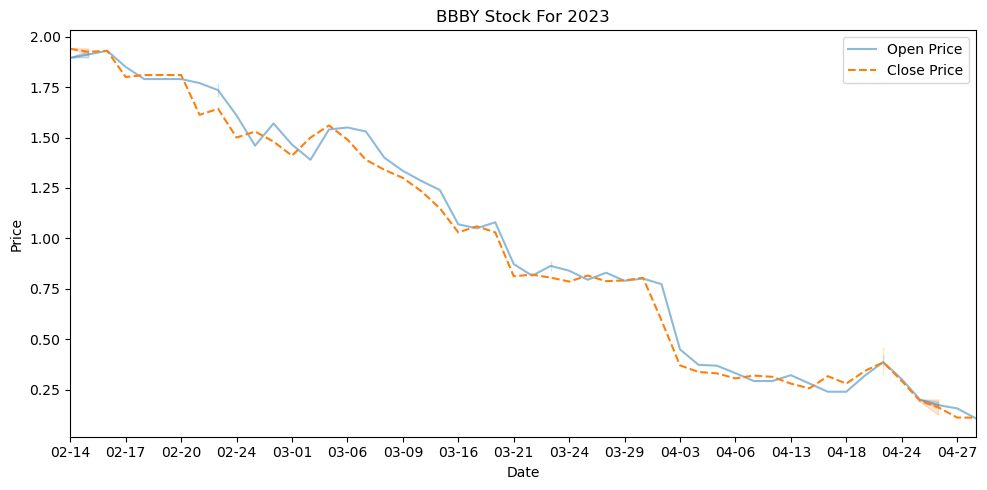

In [45]:
# Setting the figure
plt.figure(figsize= (10, 5))

# Open price line
sns.lineplot(data= stock_df, x= 'Date MMDD', y= 'Open', label= 'Open Price',
            alpha = 0.5)

# Close price line
sns.lineplot(data= stock_df, x= 'Date MMDD', y= 'Close', label= 'Close Price',
            ls= '--')

# Chart elements
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BBBY Stock For 2023')
plt.xticks(range(0, len(stock_df), 3))
plt.margins(x= 0)
plt.tight_layout()